In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (20.0, 10.0)

data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values


In [4]:
mean_x = np.mean(x)
mean_y = np.mean(y)

#total number of values
m = len(x)

number = 0
denom = 0
for i in range(m):
  number += (x[i] - mean_x) * ( y[i] - mean_y)
  denom+= (x[i] - mean_x) ** 2

b1 = number/denom
b0 =mean_y - (b1 * mean_x)

print(b1, b0)

0.26342933948939945 325.57342104944223


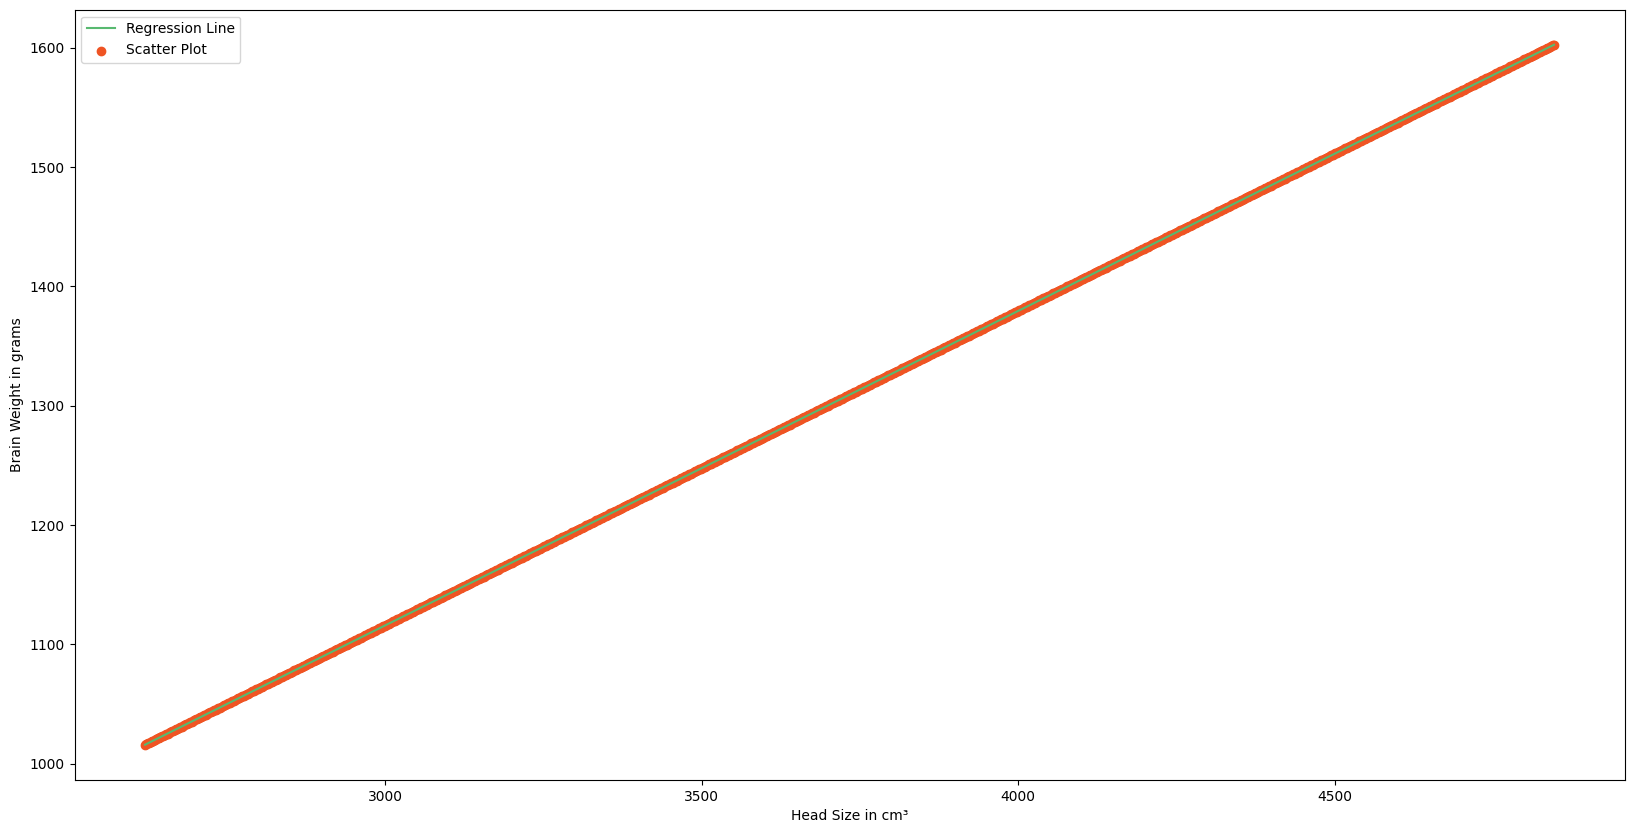

In [5]:
max_x = np.max(x) + 100
min_x = np.min(x) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Plotting Line
plt.plot(x, y, color="#58b970", label="Regression Line")
# Plotting Scatter Points
plt.scatter(x, y, c="#ef5423", label="Scatter Plot")

plt.xlabel("Head Size in cm³")
plt.ylabel("Brain Weight in grams")
plt.legend()
plt.show()


In [6]:
ss_t = 0
ss_r = 0
for i in range(m):
  y_pred =b0 + b1 * x[i]
  ss_t += (y[i] - mean_y) ** 2
  ss_r += (y[i] - y_pred) ** 2
r2 = 1 -(ss_r/ss_t)
print(r2)

1.0


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit-learn
x = x.reshape((-1, 1))

# Creating Model
reg = LinearRegression()

# Fitting training data
reg = reg.fit(x, y)

# Y Prediction
Y_pred = reg.predict(x)

# Calculating R2 Score
r2_score = reg.score(x, y)
print(r2_score)


1.0
